In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# 1. Load Data
file_path = '/home/fymsc15/Aditya_WF/AIML/Assignment03/HousePricePrediction.csv'
data = pd.read_csv(file_path)

In [13]:
# 2. Data Cleaning and Exploration
print(data.head())
print(data.info())
print(data.columns)
data.columns = data.columns.str.strip()
data.fillna(data.mean(numeric_only=True), inplace=True)


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #  

In [14]:

# 3. Simple Linear Regression
X_simple = data[['TotalBsmtSF']]
y = data['SalePrice']

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)
y_pred_simple = simple_model.predict(X_test_simple)

simple_mse = mean_squared_error(y_test_simple, y_pred_simple)
simple_rmse = np.sqrt(simple_mse)
simple_r2 = r2_score(y_test_simple, y_pred_simple)

print("Simple Linear Regression Results:")
print(f"RMSE: {simple_rmse:.2f}")
print(f"R-squared: {simple_r2:.2f}")

Simple Linear Regression Results:
RMSE: 52880.54
R-squared: 0.22


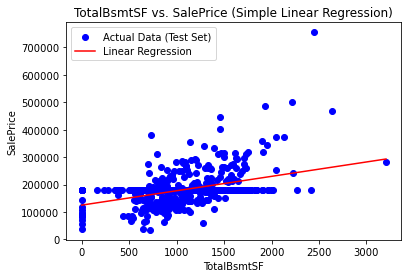

In [15]:

# 6. Visualize the Results
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Data (Test Set)')

X_test_simple_sorted, y_pred_simple_sorted = zip(*sorted(zip(X_test_simple.values.ravel(), y_pred_simple)))

plt.plot(X_test_simple_sorted, y_pred_simple_sorted, color='red', label='Linear Regression')

plt.title('TotalBsmtSF vs. SalePrice (Simple Linear Regression)')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

# ... (Multiple Linear Regression code remains the same)